# Sentiment analysis

In [1]:
#! conda install pytorch torchvision torchaudio cpuonly -c pytorch
#! pip install transformers

In [2]:
from pynytimes import NYTAPI
from transformers import pipeline
import pandas as pd
import datetime
from dateutil.relativedelta import relativedelta
import numpy as np
from tqdm.notebook import  tqdm
import matplotlib as mpl
import matplotlib.pyplot as plt

In [3]:
apiinfo=pd.read_csv("NY-API.csv")


In [4]:
nyt = NYTAPI(str(apiinfo["API-KEY"].values[0]), parse_dates=True)

In [5]:
pd. set_option('display.max_colwidth', -1)

<ipython-input-5-3502c1cad7d7>:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd. set_option('display.max_colwidth', -1)


In [6]:
classifier = pipeline("text-classification",model='bhadresh-savani/distilbert-base-uncased-emotion', return_all_scores=True)

In [7]:
def processOneMonth(date):
    articles = nyt.article_search(
        query = "commodity",
        results = 100,
        dates = {
            "begin": date,
            "end":date+ relativedelta(day=31)
        },
        options = {
            "sort": "oldest",
            "sources": [
                "New York Times",
                "AP",
                "Reuters",
                "International Herald Tribune"
            ],

        }
    )

    results=[]
    i=1
    for t in articles:
       
        res=classifier(t['lead_paragraph'])
        res[0].append({'label': 'lead paragraph', 'score':t['lead_paragraph'],\
                       })
        df=pd.DataFrame(res[0]).set_index("label")
        df=df.rename(columns={"score":"article "+str(i)})
        i+=1
        results.append(df)
    res=pd.concat(results,axis=1).T
    summary=dict()
    summary["Date"]=date
    summary["sadness"]=[(res["sadness"]>=0.5).sum()/res.shape[0]]
    summary["anger"]=[(res["anger"]>=0.5).sum()/res.shape[0]]
    summary["fear"]=[(res["fear"]>=0.5).sum()/res.shape[0]]
    summary["joy"]=[(res["joy"]>=0.5).sum()/res.shape[0]]
    summary["love"]=[(res["love"]>=0.5).sum()/res.shape[0]]
    summary["surprise"]=[(res["surprise"]>=0.5).sum()/res.shape[0]]
    summary["neg"]=[np.sum((res["sadness"]+res["anger"]+res["fear"])>=0.5)/res.shape[0]]
    summary["pos"]=[np.sum((res["joy"]+res["love"])>=0.5)/res.shape[0]]
    summary=pd.DataFrame.from_dict(summary)
 
    return res,summary

In [8]:
dates=pd.date_range(start='1/1/2019', end='3/1/2022',freq=pd.offsets.MonthBegin())
dates

DatetimeIndex(['2019-01-01', '2019-02-01', '2019-03-01', '2019-04-01',
               '2019-05-01', '2019-06-01', '2019-07-01', '2019-08-01',
               '2019-09-01', '2019-10-01', '2019-11-01', '2019-12-01',
               '2020-01-01', '2020-02-01', '2020-03-01', '2020-04-01',
               '2020-05-01', '2020-06-01', '2020-07-01', '2020-08-01',
               '2020-09-01', '2020-10-01', '2020-11-01', '2020-12-01',
               '2021-01-01', '2021-02-01', '2021-03-01', '2021-04-01',
               '2021-05-01', '2021-06-01', '2021-07-01', '2021-08-01',
               '2021-09-01', '2021-10-01', '2021-11-01', '2021-12-01',
               '2022-01-01', '2022-02-01', '2022-03-01'],
              dtype='datetime64[ns]', freq='MS')

In [9]:
%%time
res,summary=processOneMonth(dates[-1])
res

C:\Users\ttill\anaconda3\envs\pytorch\lib\site-packages\pynytimes\helpers\article_search.py:16: UserWarning: Asking for a lot of results, because of rate limits it can take a while.
  warnings.warn(


Wall time: 9.26 s


label,sadness,joy,love,anger,fear,surprise,lead paragraph
article 1,0.992797,0.000939,0.000381,0.002563,0.002621,0.0007,"As we watch Ukrainian refugees arrive by car and foot in Poland, it’s hard not to recall World War II, when the region was ravaged by fighting, famine spread and millions of Ukrainians died of starvation."
article 2,0.2863,0.033961,0.002641,0.575213,0.099127,0.002758,"As severe sanctions against Russia take shape, economists, executives and investors around the world are trying to gauge the effects. Europe and its allies will wage “total economic and financial war,” Bruno Le Maire, France’s economy minister, said today. “We are going to cause the Russian economy to collapse.”"
article 3,0.012595,0.975832,0.00165,0.006196,0.002457,0.00127,"Since the fall of the Soviet Union, investors have enjoyed decades of global economic stability in which military conflicts and foreign diplomacy played a diminished role in the movements of markets."
article 4,0.002995,0.000743,0.000199,0.009817,0.984051,0.002195,"WASHINGTON — The Russian invasion of Ukraine has rattled global supply chains that are still in disarray from the pandemic, adding to surging costs, prolonged deliveries and other challenges for companies trying to move goods around the world."
article 5,0.005243,0.894725,0.003979,0.089428,0.005626,0.000999,"Every Tuesday and Friday, Ezra Klein invites you into a conversation about something that matters, like today’s episode with Adam Tooze. Listen wherever you get your podcasts."
article 6,0.065228,0.0652,0.003248,0.678204,0.1853,0.00282,"HOUSTON — Exxon Mobil said Tuesday that it would end its involvement in a large oil and natural gas project in Russia, becoming the latest Western oil company to announce that it is leaving the country after Russia invaded Ukraine."
article 7,0.01243,0.333041,0.006366,0.63676,0.008926,0.002477,"President Biden led his first State of the Union address yesterday with a promise to make Vladimir Putin pay for invading Ukraine and praise for the Ukrainian resistance. When he turned to domestic issues, a fair amount of his hour-long speech focused on business and the economy."
article 8,0.007739,0.357248,0.003814,0.11501,0.511963,0.004226,"Jerome H. Powell, the Federal Reserve chair, told lawmakers on Wednesday that the central bank is poised to lift interest rates at its meeting this month as it tries to cool down high inflation — saying that while Russia’s invasion of Ukraine is ramping up economic uncertainty, it isn’t yet shaking the Fed off its course."
article 9,0.035192,0.10387,0.005478,0.804463,0.049042,0.001956,President Biden’s nominee for the top banking cop at the Federal Reserve was expected to face Republican backlash over her views on how finance should guard against climate change and her preference for tough regulation.
article 10,0.001801,0.000704,0.000313,0.002243,0.9775,0.017438,"After watching financial markets gyrate from hour to hour as Russia attacked Ukraine, I was getting dizzy myself."


In [10]:
summary

,Date,sadness,anger,fear,joy,love,surprise,neg,pos
0,2022-03-01,0.033333,0.466667,0.1,0.3,0.0,0.0,0.7,0.3


In [11]:
results=[]
summaries=[]
for d in tqdm(dates):
    res,summary=processOneMonth(d)
    results.append(res)
    summaries.append(summary)
results=pd.concat(results)
summaries=pd.concat(summaries)
summaries.set_index("Date",inplace=True)

  0%|          | 0/39 [00:00<?, ?it/s]

C:\Users\ttill\anaconda3\envs\pytorch\lib\site-packages\pynytimes\helpers\article_search.py:16: UserWarning: Asking for a lot of results, because of rate limits it can take a while.
  warnings.warn(


In [12]:

summaries

,sadness,anger,fear,joy,love,surprise,neg,pos
Date,,,,,,,,
2019-01-01,0.056604,0.283019,0.113208,0.433962,0.000000,0.000000,0.566038,0.433962
2019-02-01,0.102564,0.179487,0.051282,0.538462,0.025641,0.000000,0.435897,0.564103
2019-03-01,0.051282,0.179487,0.076923,0.564103,0.000000,0.000000,0.384615,0.589744
2019-04-01,0.139535,0.325581,0.093023,0.348837,0.000000,0.000000,0.651163,0.348837
2019-05-01,0.113636,0.204545,0.159091,0.386364,0.000000,0.000000,0.613636,0.386364
2019-06-01,0.100000,0.175000,0.100000,0.525000,0.025000,0.000000,0.450000,0.550000
2019-07-01,0.080000,0.400000,0.040000,0.440000,0.000000,0.040000,0.520000,0.440000
2019-08-01,0.081633,0.346939,0.142857,0.265306,0.020408,0.000000,0.714286,0.285714
2019-09-01,0.090909,0.242424,0.060606,0.515152,0.000000,0.000000,0.454545,0.545455


<AxesSubplot:xlabel='Date'>

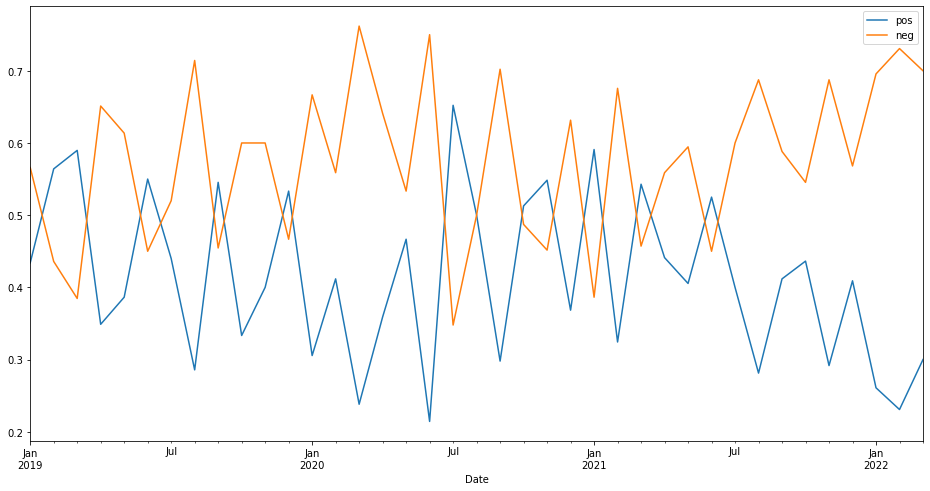

In [13]:
summaries[["pos","neg"]].plot(figsize=(16,8))

<AxesSubplot:xlabel='Date'>

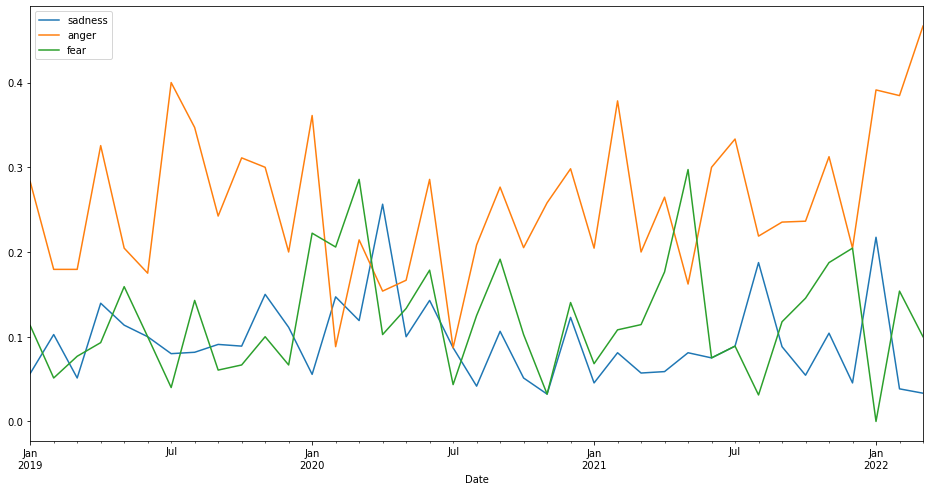

In [14]:
summaries[["sadness","anger","fear"]].plot(figsize=(16,8))

In [15]:
dates=pd.date_range(start='1/1/2016', end='12/1/2018',freq=pd.offsets.MonthBegin())
results2=[]
summaries2=[]
for d in tqdm(dates):
    res,summary=processOneMonth(d)
    results2.append(res)
    summaries2.append(summary)
results2=pd.concat(results2)
summaries2=pd.concat(summaries2)
summaries2.set_index("Date",inplace=True)

  0%|          | 0/36 [00:00<?, ?it/s]

C:\Users\ttill\anaconda3\envs\pytorch\lib\site-packages\pynytimes\helpers\article_search.py:16: UserWarning: Asking for a lot of results, because of rate limits it can take a while.
  warnings.warn(


In [16]:
summaries2

,sadness,anger,fear,joy,love,surprise,neg,pos
Date,,,,,,,,
2016-01-01,0.125000,0.295455,0.079545,0.329545,0.011364,0.011364,0.647727,0.340909
2016-02-01,0.183099,0.281690,0.126761,0.366197,0.000000,0.000000,0.633803,0.366197
2016-03-01,0.065574,0.344262,0.114754,0.393443,0.016393,0.000000,0.590164,0.409836
2016-04-01,0.163934,0.295082,0.049180,0.409836,0.000000,0.000000,0.590164,0.409836
2016-05-01,0.109091,0.381818,0.036364,0.381818,0.000000,0.000000,0.618182,0.381818
2016-06-01,0.020833,0.395833,0.083333,0.437500,0.000000,0.000000,0.562500,0.437500
2016-07-01,0.060606,0.212121,0.121212,0.484848,0.000000,0.000000,0.484848,0.515152
2016-08-01,0.086207,0.327586,0.034483,0.396552,0.000000,0.000000,0.586207,0.413793
2016-09-01,0.050000,0.300000,0.150000,0.375000,0.000000,0.000000,0.600000,0.400000


In [17]:
dates=pd.date_range(start='1/1/2014', end='12/1/2015',freq=pd.offsets.MonthBegin())
results3=[]
summaries3=[]
for d in tqdm(dates):
    res,summary=processOneMonth(d)
    results3.append(res)
    summaries3.append(summary)
results3=pd.concat(results3)
summaries3=pd.concat(summaries3)

summaries3.set_index("Date",inplace=True)

  0%|          | 0/24 [00:00<?, ?it/s]

C:\Users\ttill\anaconda3\envs\pytorch\lib\site-packages\pynytimes\helpers\article_search.py:16: UserWarning: Asking for a lot of results, because of rate limits it can take a while.
  warnings.warn(


In [18]:
summaries3

,sadness,anger,fear,joy,love,surprise,neg,pos
Date,,,,,,,,
2014-01-01,0.071429,0.321429,0.119048,0.392857,0.000000,0.000000,0.607143,0.392857
2014-02-01,0.112500,0.312500,0.087500,0.362500,0.025000,0.012500,0.587500,0.400000
2014-03-01,0.072165,0.402062,0.072165,0.360825,0.000000,0.000000,0.597938,0.391753
2014-04-01,0.024390,0.268293,0.085366,0.500000,0.000000,0.024390,0.475610,0.500000
2014-05-01,0.054795,0.273973,0.109589,0.479452,0.013699,0.000000,0.506849,0.493151
2014-06-01,0.081081,0.297297,0.148649,0.378378,0.013514,0.013514,0.594595,0.391892
2014-07-01,0.092308,0.230769,0.076923,0.507692,0.000000,0.015385,0.461538,0.523077
2014-08-01,0.140625,0.281250,0.046875,0.468750,0.015625,0.015625,0.500000,0.484375
2014-09-01,0.081967,0.426230,0.049180,0.377049,0.000000,0.000000,0.606557,0.377049


In [19]:
sum_all=pd.concat([summaries3,summaries2,summaries],axis=0)
sum_all

,sadness,anger,fear,joy,love,surprise,neg,pos
Date,,,,,,,,
2014-01-01,0.071429,0.321429,0.119048,0.392857,0.000000,0.000000,0.607143,0.392857
2014-02-01,0.112500,0.312500,0.087500,0.362500,0.025000,0.012500,0.587500,0.400000
2014-03-01,0.072165,0.402062,0.072165,0.360825,0.000000,0.000000,0.597938,0.391753
2014-04-01,0.024390,0.268293,0.085366,0.500000,0.000000,0.024390,0.475610,0.500000
2014-05-01,0.054795,0.273973,0.109589,0.479452,0.013699,0.000000,0.506849,0.493151
...,...,...,...,...,...,...,...,...
2021-11-01,0.104167,0.312500,0.187500,0.270833,0.000000,0.000000,0.687500,0.291667
2021-12-01,0.045455,0.204545,0.204545,0.409091,0.000000,0.000000,0.568182,0.409091
2022-01-01,0.217391,0.391304,0.000000,0.260870,0.000000,0.043478,0.695652,0.260870


<AxesSubplot:xlabel='Date'>

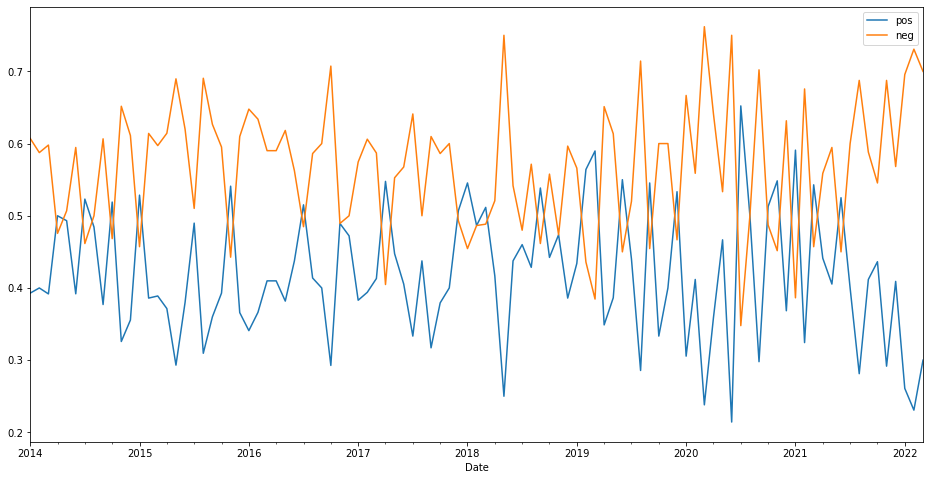

In [20]:
sum_all[["pos","neg"]].plot(figsize=(16,8))

<AxesSubplot:xlabel='Date'>

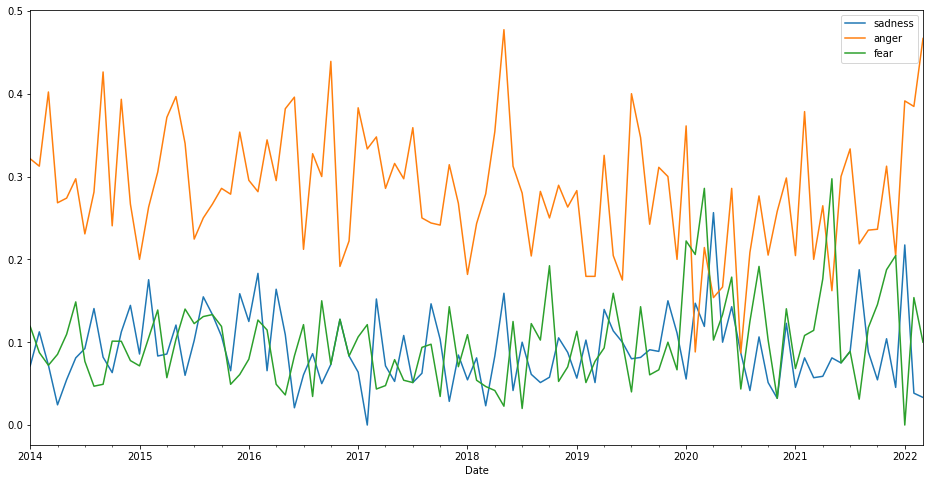

In [21]:
sum_all[["sadness","anger","fear"]].plot(figsize=(16,8))